# **Keras Cats vs Dogs - Training using your own data**

---

In this lesson, I will setup data generators to load our own dataset and train a classifier using Keras.
1. Download and Explore our data
2. Create a simple CNN
3. Create our Data Generators
4. Train our model
5. Test some inferences
6. Checkpoints

In [1]:
# import our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## **1. Download and Explore our Data**

In [2]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
From (redirected): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk&confirm=t&uuid=bc092926-a86f-4d6e-896d-987c1df3dc99
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:13<00:00, 64.2MB/s]


In [3]:
# Define our images sizes
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

### **Loading our data and it's labels into a dataframe**

There are many ways we can do this, this way is relatively simple to follow.

`dog.1034234.jpg`

In [4]:
filenames = os.listdir("./train")

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'class': categories
})
df.head()

,filename,class
0,dog.8839.jpg,1
1,dog.1566.jpg,1
2,dog.6268.jpg,1
3,cat.7371.jpg,0
4,dog.9620.jpg,1


### **Check the counts in each class**

<Axes: xlabel='class'>

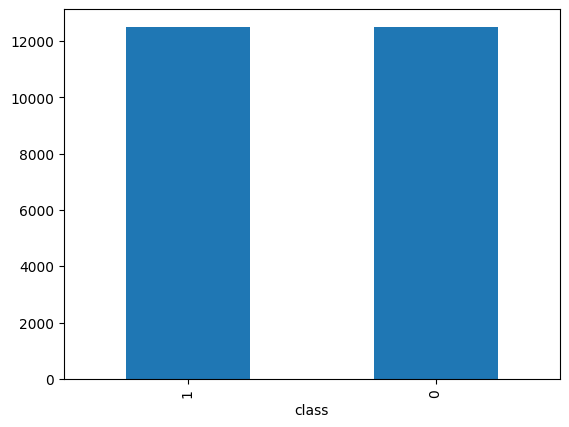

In [5]:
df['class'].value_counts().plot.bar()

#### **View a sample image**

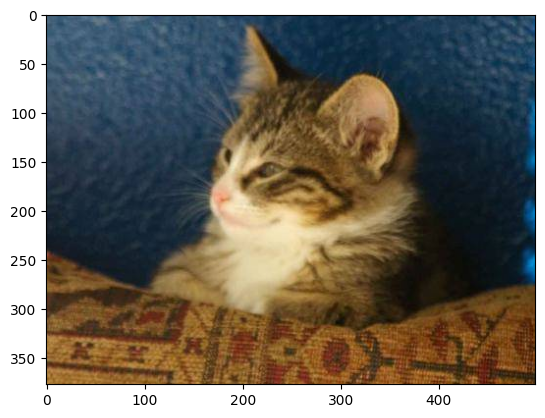

In [6]:
sample = random.choice(filenames)
image = load_img("./train/" + sample)
plt.imshow(image)

## **2. Create our Model**

In [7]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 58, 58, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 466,594 (1.78 MB)

 Trainable params: 466,594 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

## **3. Create our Data Generators**

In [8]:
df["class"] = df["class"].replace({0: 'cat', 1: 'dog'})
df.head()

,filename,class
0,dog.8839.jpg,dog
1,dog.1566.jpg,dog
2,dog.6268.jpg,dog
3,cat.7371.jpg,cat
4,dog.9620.jpg,dog


#### **Split our dataset using train_test_split**

In [9]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=7)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [10]:
train_df.head()

,filename,class
0,dog.543.jpg,dog
1,dog.7603.jpg,dog
2,dog.6728.jpg,dog
3,cat.9457.jpg,cat
4,cat.11502.jpg,cat


In [11]:
validate_df.head()

,filename,class
0,cat.3518.jpg,cat
1,dog.4233.jpg,dog
2,cat.11245.jpg,cat
3,dog.2565.jpg,dog
4,cat.7308.jpg,cat


### **Create our Training Data Generator**

In [12]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./train/",
    x_col = 'filename',
    y_col = 'class',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### **Create our Validation Data Generator**

In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


#### **Creating an example Data Generator to load just a single image**

In [14]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


#### **Preview that image**

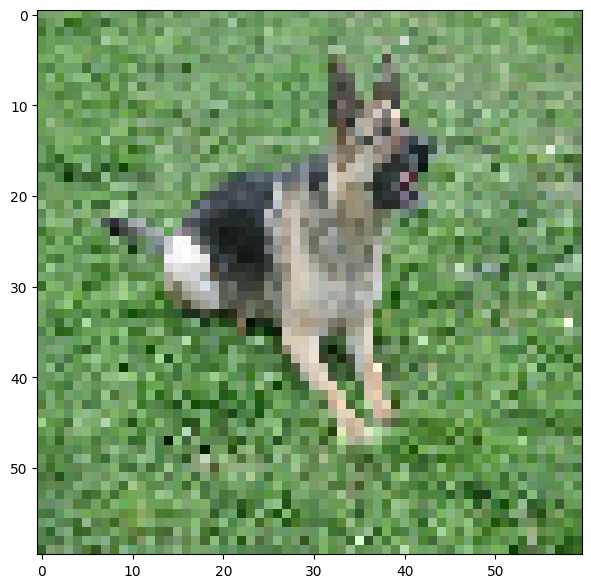

In [15]:
plt.figure(figsize=(6, 6))

for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

## **4. Start Training Our Model**

In [16]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.6066 - loss: 0.6465 - val_accuracy: 0.7464 - val_loss: 0.5177
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.7677 - loss: 0.4866 - val_accuracy: 0.7668 - val_loss: 0.4823
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.7988 - loss: 0.4319 - val_accuracy: 0.7913 - val_loss: 0.4477
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8302 - loss: 0.3841 - val_accuracy: 0.8051 - val_loss: 0.4433
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.8486 - loss: 0.3427 - val_accuracy: 0.8147 - val_loss: 0.4382
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8814 - loss: 0.2791 - val_accuracy: 0.8021 - val_loss: 0.4488
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9073 - loss: 0.2231 - val_accuracy: 0.8097 - val_loss: 0.4713
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.9342 - loss: 0.1690 - val_accurac

In [19]:
# Save our model
model.save_weights(".weights.h5")

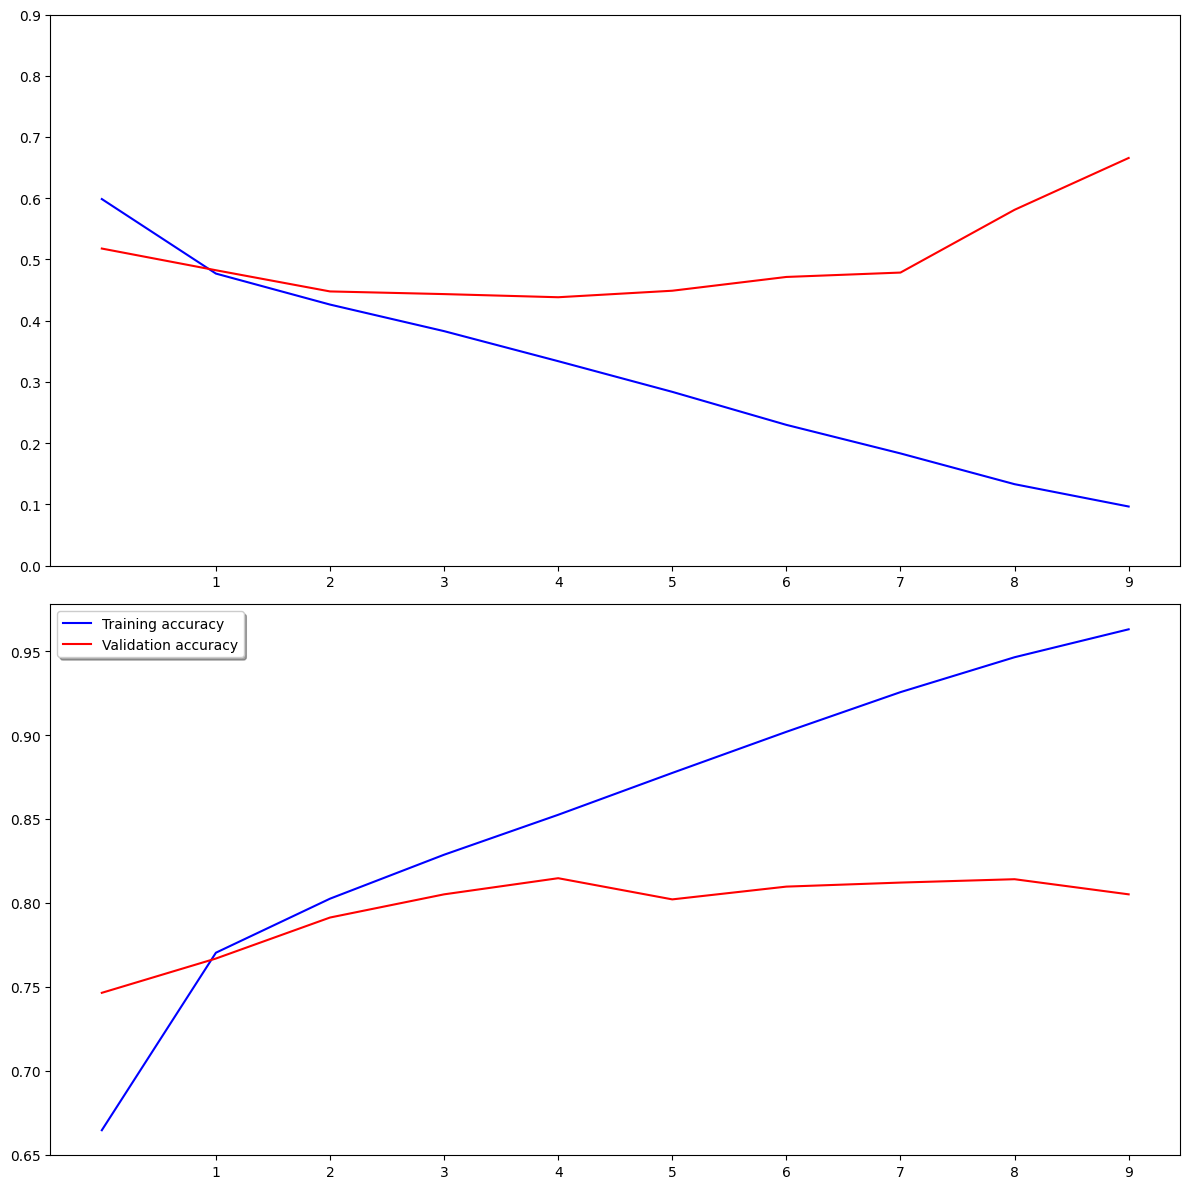

In [20]:
# Viewour for performance plots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#### **Get the predictions for our validation images**

In [24]:
# We run our prediction on all images in the validation set
predict = model.predict(validation_generator, steps = int(np.ceil(5000/batch_size)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step


#### **Add it to our dataframe for eacy viewing**

In [25]:
validate_df['predicted'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['predicted'] = validate_df['predicted'].replace(label_map)
validate_df

,filename,class,predicted
0,cat.3518.jpg,cat,cat
1,dog.4233.jpg,dog,dog
2,cat.11245.jpg,cat,cat
3,dog.2565.jpg,dog,cat
4,cat.7308.jpg,cat,cat
...,...,...,...
4995,cat.9143.jpg,cat,dog
4996,cat.11558.jpg,cat,dog
4997,cat.4347.jpg,cat,dog
4998,cat.4065.jpg,cat,dog


## **Inference on a batch of images from our validation dataset**

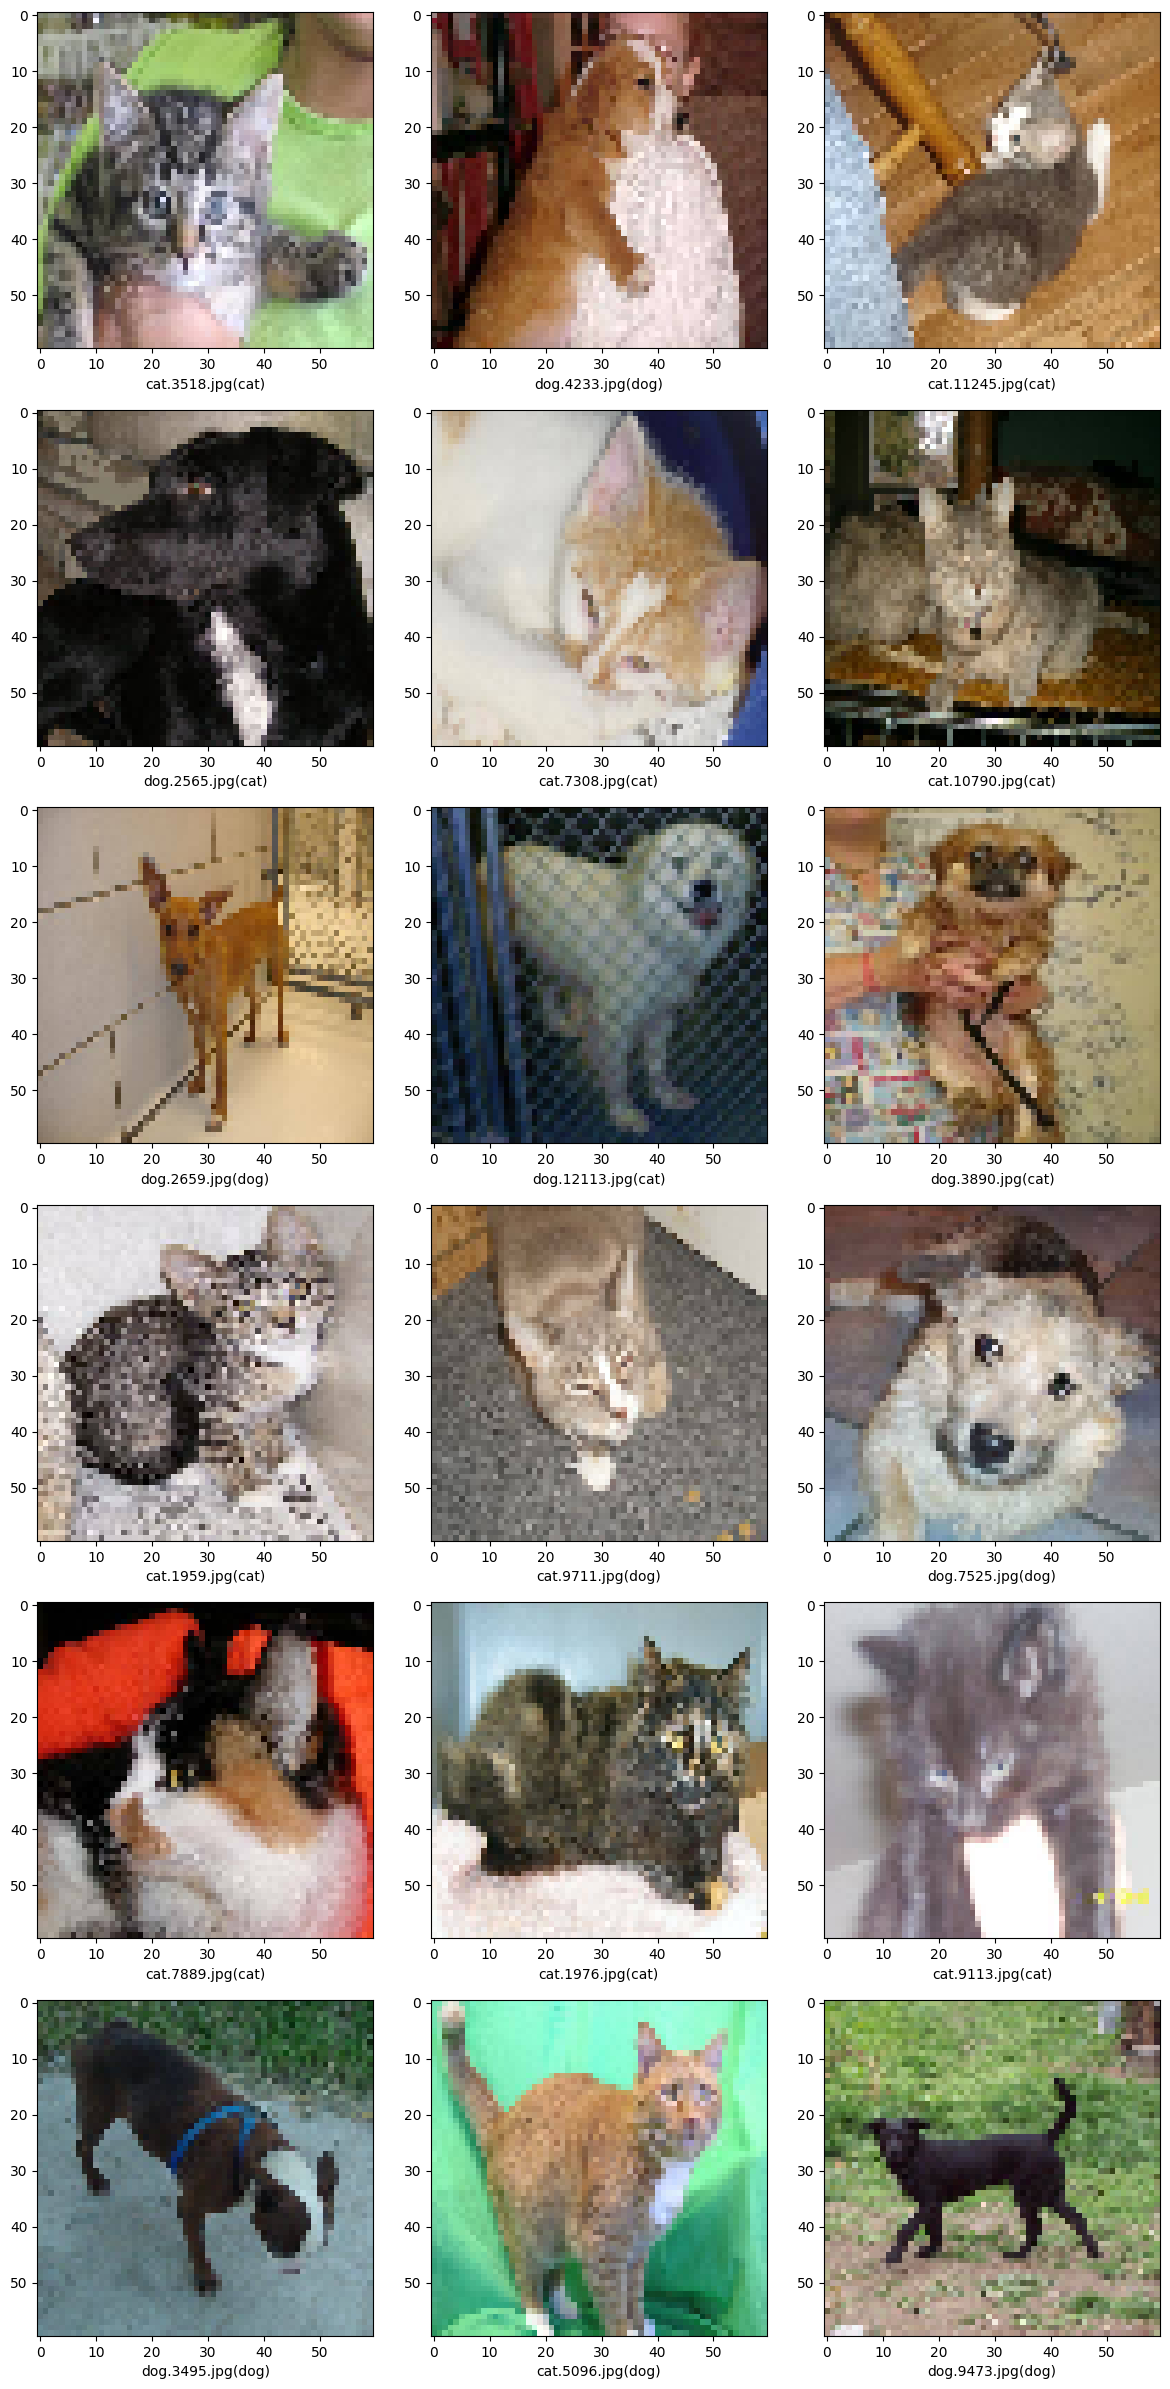

In [26]:
sample_test = validate_df.head(18)
sample_test.head()

plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['predicted']
    img = load_img("./train/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )

plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [28]:
checkpoint = ModelCheckpoint("MNIST_Checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 5, #Number of epochs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

### **Another useful callback is Reducing our learning Rate on Plateau**

We can avoid having our oscillate around the global minimum by attempting to reduce the Learn Rate by a certain fact. If no improvement is seen in our monitored metric (val_loss typically), we wait a certain number of epochs (patience) then this callback reduces the learning rate by a factor

In [29]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

In [30]:
# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

In [31]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9754 - loss: 0.0674
Epoch 1: val_loss improved from inf to 0.71745, saving model to MNIST_Checkpoint.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9753 - loss: 0.0674 - val_accuracy: 0.8119 - val_loss: 0.7175 - learning_rate: 5.0000e-04
Epoch 2/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9806 - loss: 0.0550
Epoch 2: val_loss improved from 0.71745 to 0.66719, saving model to MNIST_Checkpoint.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9805 - loss: 0.0550 - val_accuracy: 0.8151 - val_loss: 0.6672 - learning_rate: 5.0000e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9862 - loss: 0.0417
Epoch 3: val_loss did not improve from 0.66719
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.9862 - loss: 0.0417 - val_accuracy: 0.7947 - val_loss: 0.8755 - learning_rate: 5.0000e-04
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9854 - loss: 0.0434
Epoch 4: val_loss did not improve from 0.66719
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.9854 - loss: 0.0434 - val_accuracy: 0.8105 - val_loss: 0.7980 - learning_rate: 5.0000e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9856 - loss: 0.0387
Epoch 5: val_loss did not improve from 0.66719

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9856 - loss: 0.0387 - 